In [2]:
from google.cloud import bigquery

client = bigquery.Client()

dataset_ref = client.dataset("hacker_news", project = "bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [5]:
tables = list(client.list_tables(dataset))

for table in tables:
    print(table.table_id)

full


In [7]:
table_ref = dataset_ref.table("full")
table = client.get_table(table_ref)

client.list_rows(table, max_results = 5).to_dataframe()

,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,None,True,Adoum_Tech,2,1713995025,2024-04-24 21:43:45+00:00,story,40150086,<NA>,<NA>,<NA>,<NA>
1,None,None,None,True,belter,2,1713995286,2024-04-24 21:48:06+00:00,story,40150135,<NA>,<NA>,<NA>,<NA>
2,None,None,None,True,Rinzler89,1,1713995678,2024-04-24 21:54:38+00:00,story,40150207,<NA>,<NA>,<NA>,<NA>
3,None,None,None,True,stockstobuynow,1,1713995704,2024-04-24 21:55:04+00:00,story,40150212,<NA>,<NA>,<NA>,<NA>
4,None,None,None,True,FLMAN407,1,1713995772,2024-04-24 21:56:12+00:00,story,40150229,<NA>,<NA>,<NA>,<NA>


In [ ]:
# Work with "comments" table
table_ref = dataset_ref.table("comments")
table = client.get_table(table_ref)
client.list_rows(table, max_results = 5).to_dataframe() 

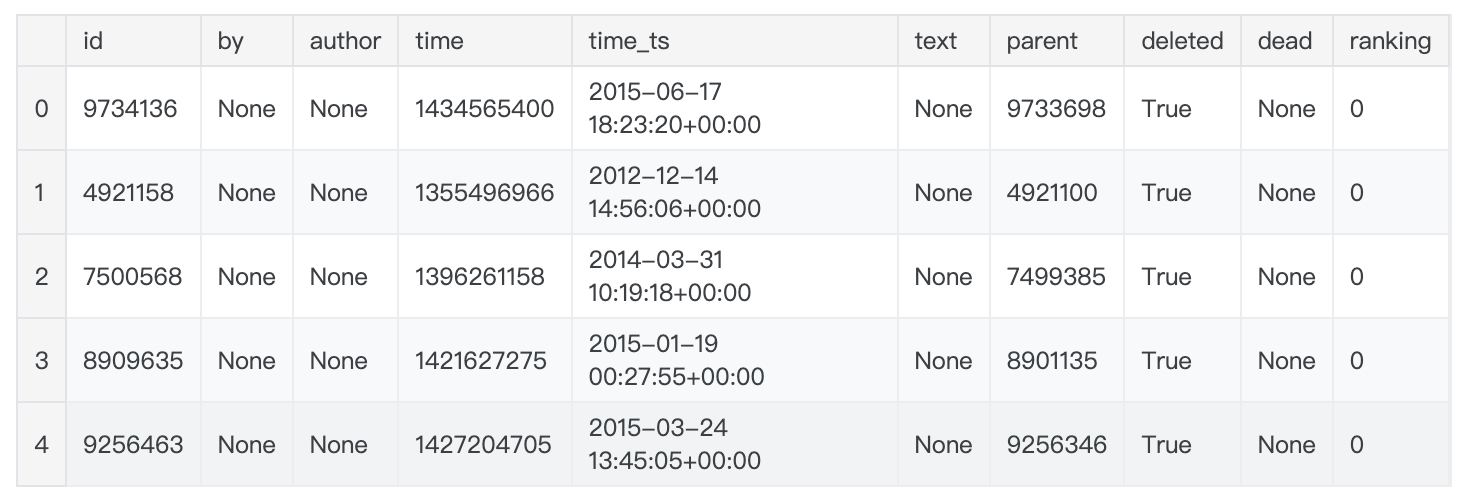

In [ ]:
# Work with "stories" table

table_ref = dataset_ref.table("stories")

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()


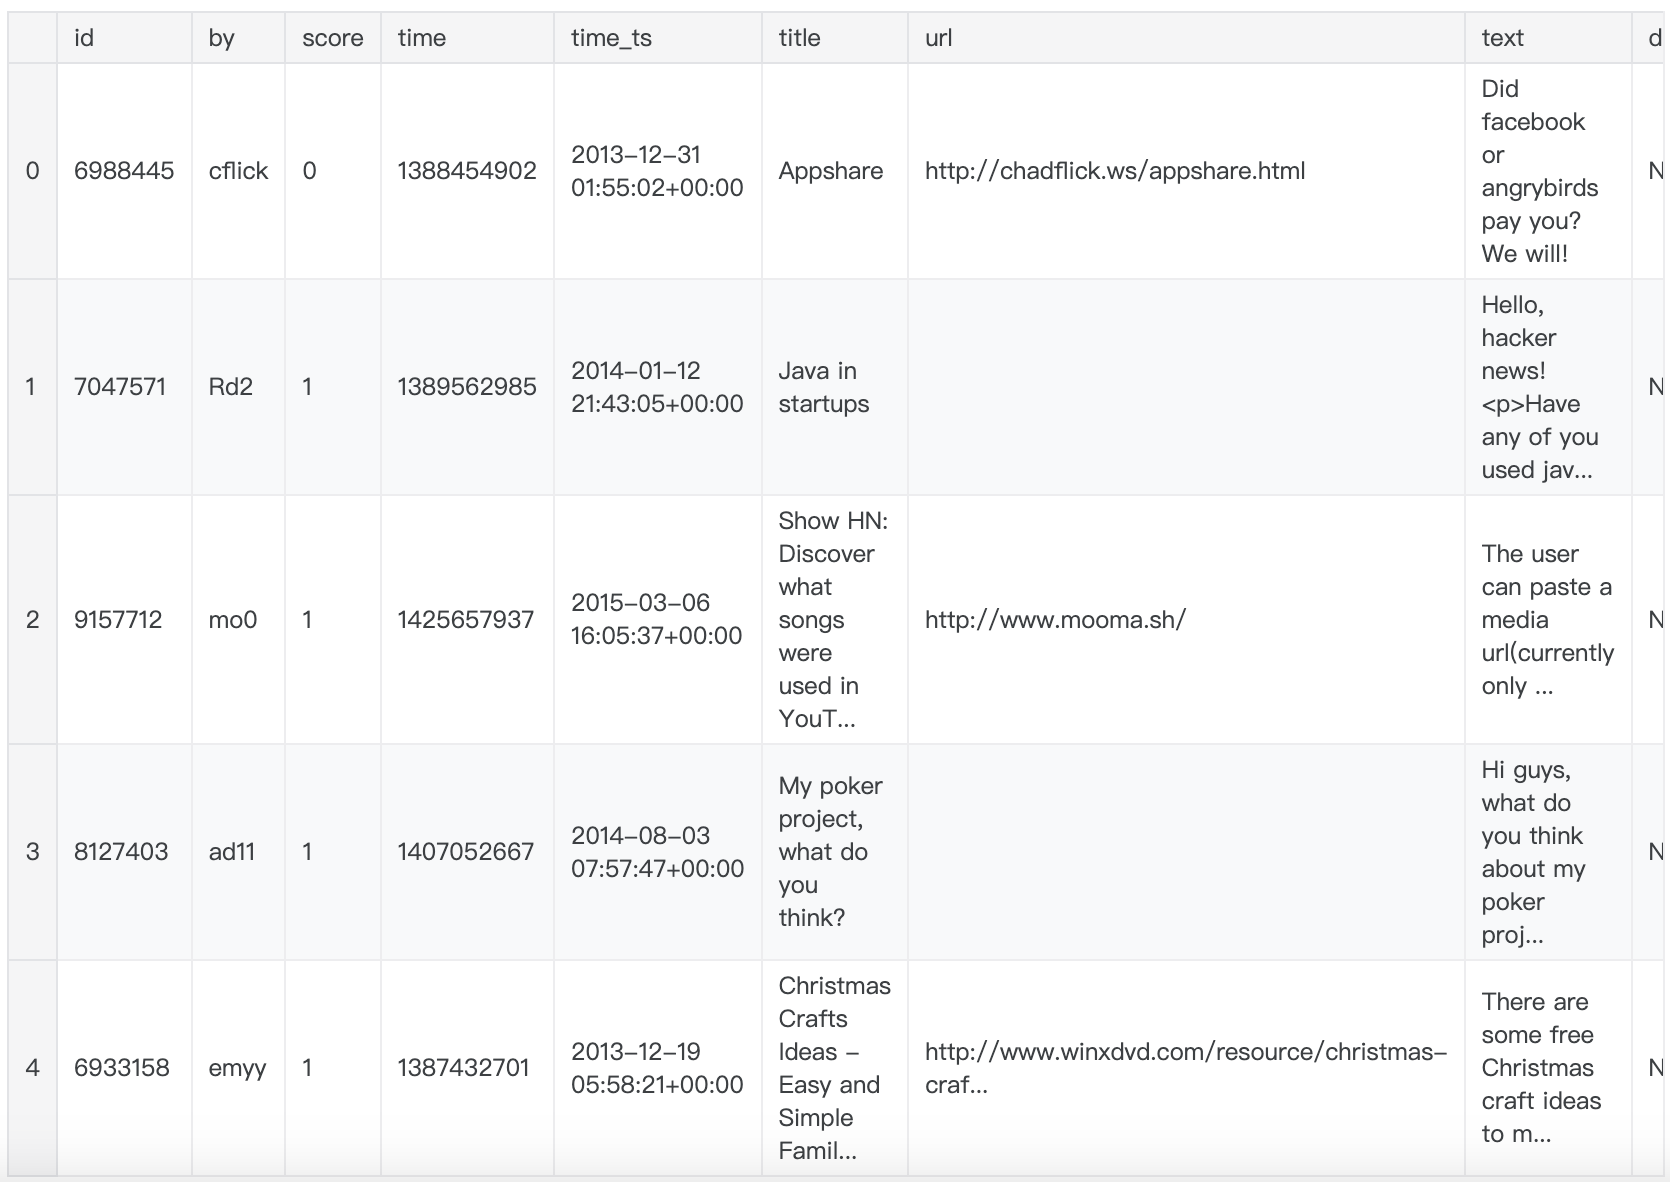

In [ ]:
# Query to select all stories posted on January 1, 2012, with number of comments

join_query = """
             WITH c AS
             (
             SELECT parent, COUNT(*) as num_comments
             FROM `bigquery-public-data.hacker_news.comments`
             GROUP BY parent
             )
             SELECT s.id AS story_id, s.by, s.title, c.num_comments
             FROM `bigquery-public-data.hacker_news.stories` AS s
             LEFT JOIN c
             ON s.id = c.parent
             WHERE EXTRACT(DATE FROM s.time_ts) = '2012-01-01'
             ORDER BY c.num_comments DESC
             """

join_result = client.query(join_query).result().to_dataframe()
join_result.head()

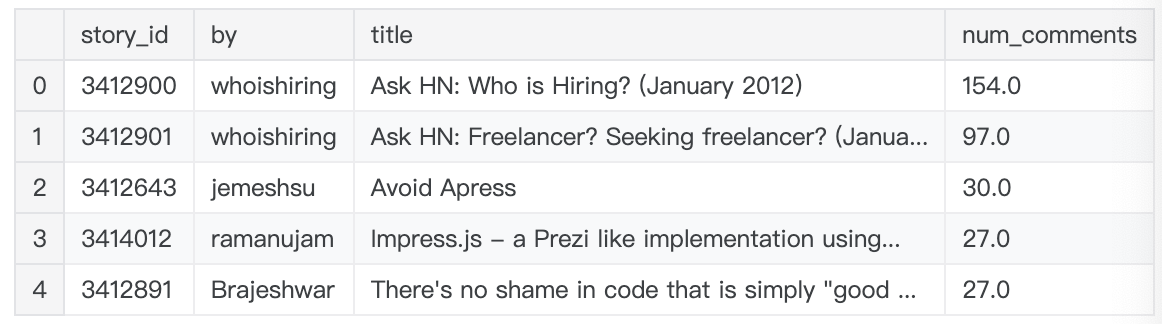

In [ ]:
# None of these stories received any comments
join_result.tail()

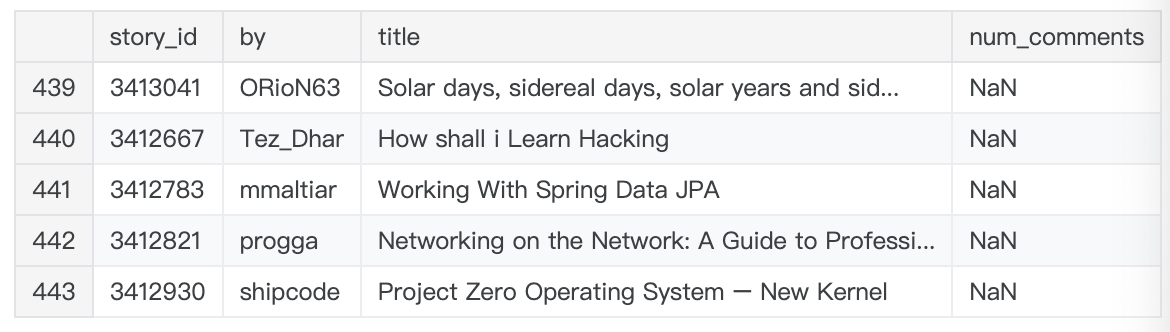

In [ ]:
# Query to select all users who posted stories or comments on January 1, 2014

union_query = """
              SELECT c.by
              FROM `bigquery-public-data.hacker_news.comments` AS c
              WHERE EXTRACT(DATE FROM c.time_ts) = '2014-01-01'
              UNION DISTINCT
              SELECT s.by
              FROM `bigquery-public-data.hacker_news.stories` AS s
              WHERE EXTRACT(DATE FROM c.time_ts) = '2014-01-01'
              """

union_result = client.query(union_query).result().to_dataframe()
union_result.head()

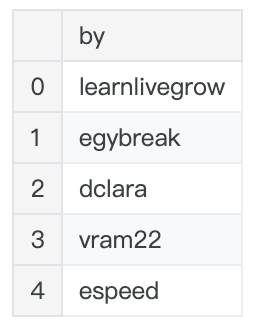

In [ ]:
# Number of users who posted stories or comments on January 1, 2014
len(union_result)